In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2023-03-01 14:54:37.142502


# Dataframe matplotlib-grafiikaksi - perusasiat

* Jos teen kaavion suoraan dataframesta (df.plot...), niin käytän pandas-kirjastoon matplotlibin pohjalta rakennettua "viritelmää" kaavion teosta.
* Lue lisää https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html


* **matplotlib.pyplot** sisältää komentoja kaavion muotoiluun. Aivan kaikkea näillä komennoilla ei saa tehtyä. 
* Lue lisää https://matplotlib.org/stable/tutorials/introductory/pyplot.html ja 
* https://matplotlib.org/stable/api/pyplot_summary.html


* Joissain tapauksissa tarvitaan kaavion luonnin palauttamaa **Axes**-luokan oliota kaavion muotoiluun.
* Lue lisää https://matplotlib.org/stable/api/axes_api.html
    
Seuraavassa teen kaaviot suoraan dataframesta ja käytän muotoiluun matplot.pyplot-komentoja (plt...).

**Seaborn** on matplotlibin päälle rakennettu kirjasto, joka tekee monista vaikeista asioista helppoja. Tässä muistiossa en käytä sitä muuuhun kuin grafiikan tyylimäärittelyyn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely, joka sisältää taustaviivoitukset (grid)
# Mahdollisia tyylejä darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')

In [3]:
# Luon dataframen
df1 = pd.DataFrame({'Myynti 2017':[1321847, 852669, 1032199, 568230]},
                  index=['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df1

,Myynti 2017
Helsinki,1321847
Turku,852669
Tampere,1032199
Oulu,568230


## Dataframesta kaavioksi

* `df.plot()` luo oletuksena viivakaavion
* Pystypylväskaavio: `df.plot.bar()`, vaakapylväskaavio: `df.plot.barh()`

<AxesSubplot:>

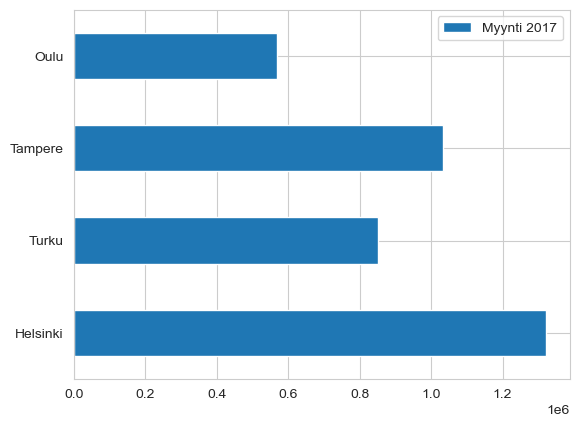

In [4]:
# Myynnit vaakapylväskaaviona
df1.plot.barh()

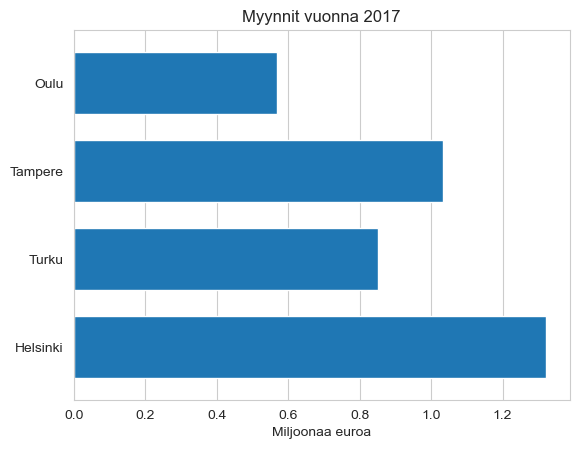

In [5]:
# Pientä tuunausta kaavion luonnin yhteyteen: 
# selite (legend) piiloon
# pylvään leveyden (width) määritys
(df1 / 1000000).plot.barh(legend=False, width=0.7)

# Otsikoita
plt.title('Myynnit vuonna 2017')
plt.xlabel('Miljoonaa euroa')

# Poistan vaakasuuntaisen taustaviivoituksen
plt.grid(axis='y')

In [6]:
# Luon uuden dataframen
df2 = pd.DataFrame({'Myynti 2017':[1321847, 852669, 1032199, 568230],
       'Myynti 2016':[1203434, 923450, 1023563, 542399]},
       index=['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df2

,Myynti 2017,Myynti 2016
Helsinki,1321847,1203434
Turku,852669,923450
Tampere,1032199,1023563
Oulu,568230,542399


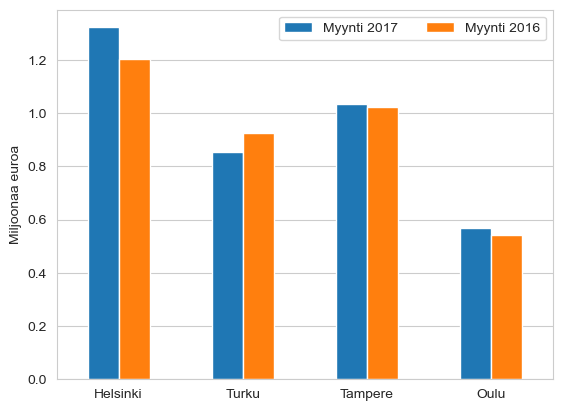

In [7]:
# Luokka-akselin nimiöiden asennon säätö (rot=0)
(df2 / 1000000).plot.bar(rot=0)

# y-akselin otsikko
plt.ylabel('Miljoonaa euroa')

# Selitteeseen 2 saraketta (2 selitettä vierekkäin)
plt.legend(ncol=2)

# Poistan pystysuuntaisen taustaviivoituksen
plt.grid(axis='x')

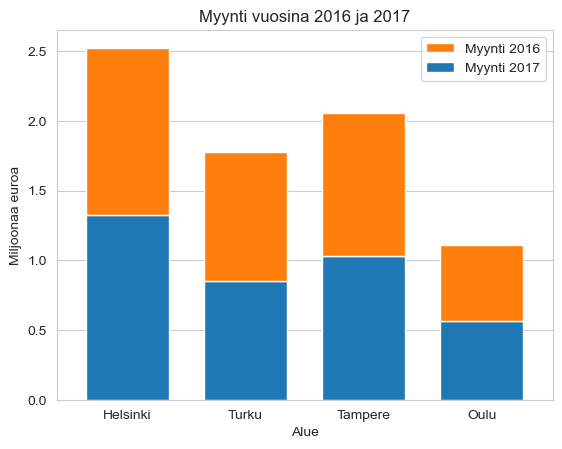

In [8]:
# legend='reverse' kääntää selitteen järjestyksen
# rot=0 määrittää luokka-akselin nimiöiden asennon
# stacked=True pinoaa pylväät päällekkäin
# width=0.7 määrittää pylväiden leveyden (enintään 1)

(df2 / 1000000).plot.bar(legend='reverse', rot=0, stacked=True, width=0.7)

# Otsikoinnit
plt.title('Myynti vuosina 2016 ja 2017')
plt.xlabel('Alue')
plt.ylabel('Miljoonaa euroa')

# Poistan pystysuuntaisen taustaviivoituksen
plt.grid(axis='x')

In [9]:
# Luon uuden dataframen
df3 = pd.DataFrame({'Mies':[17, 15, 6],'Nainen':[8, 15, 21]},
                  index=['Tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 'Tyytyväinen'])
df3

,Mies,Nainen
Tyytymätön,17,8
Ei tyytymätön eikä tyytyväinen,15,15
Tyytyväinen,6,21


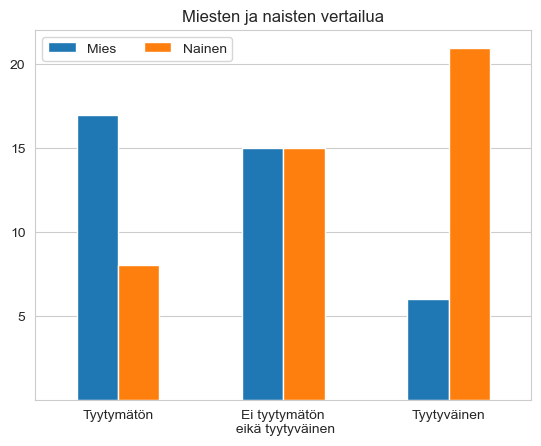

In [10]:
# Luokka-akselin nimiöiden kääntö (rot)
df3.plot.bar(rot=0)

plt.title('Miesten ja naisten vertailua')

# Asetan y-akselin jakoviivat
plt.yticks([5, 10, 15, 20])

# Selite kahteen sarakkeeseen
plt.legend(ncol=2)

# poistan pystysuuntaisen taustaviivoituksen
plt.grid(axis='x')

# Määrittelen luokka-akselin nimiöt, jotta voin lisätä rivinvaihdon (\n) haluamaani kohtaan
plt.xticks([0, 1, 2], ['Tyytymätön', 'Ei tyytymätön\n eikä tyytyväinen', 'Tyytyväinen'])

# Tallennan kaavion tai tarkkaan ottaen tallenna kuvion (figure), jonka sisällä kaavio on
# Kuvioon (figure) pääsen käsiksi plt.gcf-funktiolla (get current figure)
# Ilman parametria bbox_inches='tight' kuvion reunoilta voi jäädä osia tallentumatta
plt.gcf().savefig('testi.png', bbox_inches='tight')

In [11]:
# Tällä selvitän tarjolla olevat kaavion tallennusmuodot
plt.figure().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 640x480 with 0 Axes>

<h3>Usean kaavion kuviot</h3>

* Kaavio (**Axes**-olio) on aina **figure** (kuvio) -olion sisällä 
* **Figure**-olion sisään voin sijoittaa useita kaavioita **plt.subplots**-funktiolla
* **plt.subplots** palauttaa sekä kuvio-olion (**fig**) että listan kaavio-olioista (**axs**)

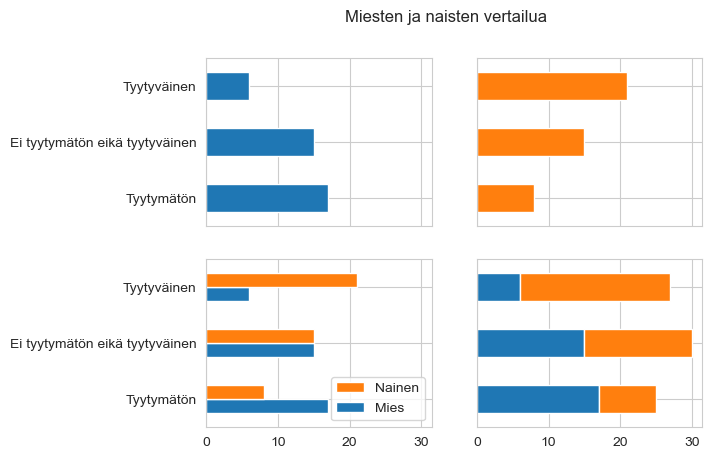

In [12]:
# 2x2 kaaviomatriisi
# sharex- ja sharey-lisäparametreilla asetan kaavioille yhteiset akselit
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

# Kuvion (figure) otsikko
fig.suptitle('Miesten ja naisten vertailua', fontsize=12)

# Vasemman yläkulman kaavio
df3['Mies'].plot.barh(ax=axs[0,0])

# Oikean yläkulman kaavio; värinä väripaletin toinen väri (C1)
df3['Nainen'].plot.barh(color='C1', ax=axs[0, 1])

# Vasemman alakulman kaavio
df3.plot.barh(legend='reverse', ax=axs[1, 0])

# Oikean alakulman kaavio
df3.plot.barh(legend=False, stacked=True, ax=axs[1, 1])

# Tallennan kuvion
# Ilman lisäparametria bbox_inches='tight' kuvion reunoilta voi jäädä osia tallentumatta
fig.savefig('testi2.png', bbox_inches='tight')

## Lisätietoa

Osaat paljon enemmän, jos käyt läpi seitsemänosaisen notebook-sarjani matplotlibin perusteista. Aloita tästä:

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb